In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

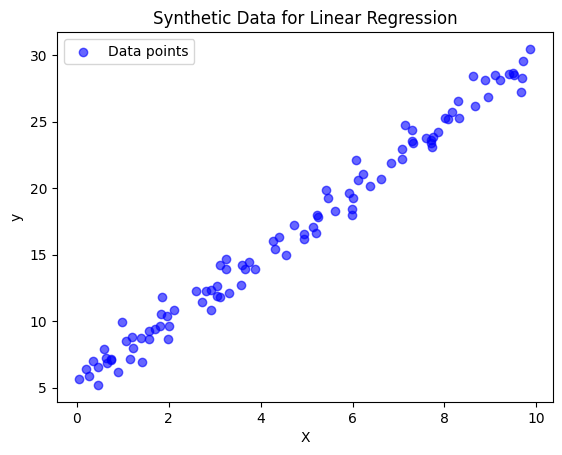

In [2]:
# Number of samples
n_samples = 100

# Feature values (X): uniformly random between 0 and 10
X = np.random.rand(n_samples, 1) * 10

# True parameters (slope and intercept)
theta_true = [2.5, 5]  # slope = 2.5, intercept = 5

# Generate target values (y) with Gaussian noise
noise = np.random.randn(n_samples, 1)
y = theta_true[0] * X + theta_true[1] + noise

# Visualize the data
plt.scatter(X, y, color="blue", alpha=0.6, label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data for Linear Regression")
plt.legend()
plt.show()

In [3]:
def hypothesis(X, theta):
    """
    Linear hypothesis function h(x) = theta0 * x + theta1
    Here, theta[0] is slope, theta[1] is intercept.
    """
    return theta[0] * X + theta[1]

In [4]:
def compute_cost(X, y, theta):
    """
    Compute Mean Squared Error (MSE) cost.
    """
    m = len(y)
    y_pred = hypothesis(X, theta)
    cost = (1/(2*m)) * np.sum((y_pred - y)**2)
    return cost

In [5]:
def compute_gradient(X, y, theta):
    """
    Compute gradient of the cost function with respect to parameters.
    """
    m = len(y)
    y_pred = hypothesis(X, theta)
    
    d_theta0 = (1/m) * np.sum((y_pred - y) * X)  # derivative wrt slope
    d_theta1 = (1/m) * np.sum(y_pred - y)        # derivative wrt intercept
    
    return np.array([d_theta0, d_theta1])

In [6]:
def gradient_descent(X, y, theta, alpha, n_iterations):
    """
    Perform gradient descent optimization.
    """
    cost_history = []
    
    for i in range(n_iterations):
        grad = compute_gradient(X, y, theta)
        theta = theta - alpha * grad
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        # Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}, Parameters = {theta}")
    
    return theta, cost_history

In [7]:
# Initialize parameters randomly (slope=0, intercept=0)
theta_init = np.random.randn(2)

# Learning rate and iterations
alpha = 0.01
n_iterations = 1000

# Train model
theta_final, cost_history = gradient_descent(X, y, theta_init, alpha, n_iterations)

print("\nFinal Parameters:")
print(f"Slope (theta0): {theta_final[0]}")
print(f"Intercept (theta1): {theta_final[1]}")

Iteration 0: Cost = 67.7737, Parameters = [0.94336951 1.60592179]
Iteration 100: Cost = 1.2898, Parameters = [2.83812243 2.71604607]
Iteration 200: Cost = 0.9120, Parameters = [2.74498006 3.32205389]
Iteration 300: Cost = 0.6952, Parameters = [2.67442427 3.78110767]
Iteration 400: Cost = 0.5708, Parameters = [2.62097793 4.12884309]
Iteration 500: Cost = 0.4994, Parameters = [2.58049207 4.39225432]
Iteration 600: Cost = 0.4584, Parameters = [2.54982384 4.59178957]
Iteration 700: Cost = 0.4349, Parameters = [2.52659251 4.74293847]
Iteration 800: Cost = 0.4215, Parameters = [2.50899467 4.85743447]
Iteration 900: Cost = 0.4137, Parameters = [2.49566422 4.94416574]

Final Parameters:
Slope (theta0): 2.4856540714383457
Intercept (theta1): 5.009294309514268


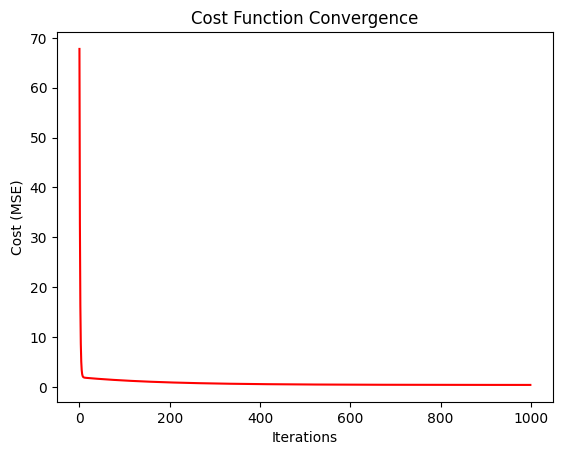

In [8]:
plt.plot(range(len(cost_history)), cost_history, color="red")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.show()

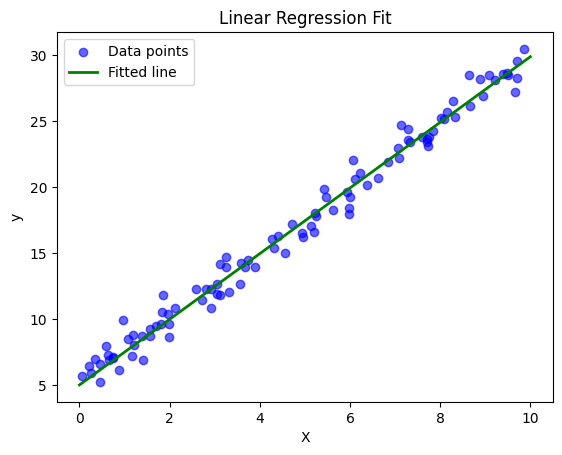

In [9]:
# Plot original data
plt.scatter(X, y, color="blue", alpha=0.6, label="Data points")

# Plot fitted line
X_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_line = hypothesis(X_line, theta_final)

plt.plot(X_line, y_line, color="green", linewidth=2, label="Fitted line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

In [10]:
# Test on new data
X_new = np.array([[12], [15]])
y_pred_new = hypothesis(X_new, theta_final)

print("Predictions on new data:")
for i, x_val in enumerate(X_new):
    print(f"X = {x_val[0]} --> Predicted y = {y_pred_new[i][0]:.2f}")

Predictions on new data:
X = 12 --> Predicted y = 34.84
X = 15 --> Predicted y = 42.29
